<a href="https://colab.research.google.com/github/Sathsarani0412/Dyscalculia_Detection_App_Hapan_Mithuro-/blob/main/model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
from google.colab import files
files.upload()


Saving attention_dataset (1).csv to attention_dataset (1).csv


{'attention_dataset (1).csv': b'activity10_score,activity10_time_sec,activity11_score,activity11_time_sec,accuracy_rate,skip_rate,attention_impairment\n0,35,1,26,0.83,0.02,no\n1,17,1,41,0.72,0.18,no\n1,77,-1,125,0.44,0.3,yes\n1,30,1,34,0.84,0.2,no\n1,17,1,24,0.88,0.04,no\n0,32,0,28,0.7,0.06,no\n1,22,1,34,0.75,0.1,no\n1,36,1,29,0.87,0.01,no\n0,58,0,97,0.33,0.53,yes\n0,27,0,37,0.86,0.15,no\n0,73,0,64,0.27,0.31,yes\n1,25,1,38,0.91,0.18,no\n1,85,0,77,0.55,0.55,yes\n1,38,1,24,0.92,0.16,no\n0,47,1,50,0.49,0.39,yes\n1,24,1,32,0.76,0.22,no\n1,19,1,42,0.88,0.13,no\n0,33,1,41,0.96,0.16,no\n1,26,1,31,0.82,0.22,no\n1,15,1,20,0.77,0.11,no\n-1,116,1,76,0.37,0.39,yes\n1,36,0,43,0.91,0.09,no\n-1,46,0,52,0.32,0.41,yes\n1,36,1,42,0.78,0.23,no\n1,20,1,42,0.9,0.19,no\n1,34,1,21,0.89,0.13,no\n0,20,1,35,0.71,0.15,no\n1,63,0,69,0.46,0.37,yes\n0,45,-1,60,0.34,0.35,yes\n-1,60,0,139,0.59,0.51,yes\n0,19,0,24,0.96,0.05,no\n1,34,0,43,0.82,0.22,no\n-1,69,-1,67,0.26,0.52,yes\n0,77,1,117,0.29,0.43,yes\n0,61,-1,82,0.4

In [4]:
import os
os.listdir()


['.config', 'attention_dataset (1).csv', 'sample_data']

In [7]:
import pandas as pd

df = pd.read_csv("attention_dataset (1).csv")
df.head()


,activity10_score,activity10_time_sec,activity11_score,activity11_time_sec,accuracy_rate,skip_rate,attention_impairment
0,0,35,1,26,0.83,0.02,no
1,1,17,1,41,0.72,0.18,no
2,1,77,-1,125,0.44,0.30,yes
3,1,30,1,34,0.84,0.20,no
4,1,17,1,24,0.88,0.04,no


In [9]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   activity10_score      240 non-null    int64  
 1   activity10_time_sec   240 non-null    int64  
 2   activity11_score      240 non-null    int64  
 3   activity11_time_sec   240 non-null    int64  
 4   accuracy_rate         240 non-null    float64
 5   skip_rate             240 non-null    float64
 6   attention_impairment  240 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 13.3+ KB


,activity10_score,activity10_time_sec,activity11_score,activity11_time_sec,accuracy_rate,skip_rate
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.525000,46.645833,0.500000,53.370833,0.679917,0.255875
std,0.696224,28.868400,0.672222,32.426679,0.239078,0.194487
min,-1.000000,15.000000,-1.000000,20.000000,0.210000,0.000000
25%,0.000000,25.000000,0.000000,30.750000,0.460000,0.107500
50%,1.000000,34.000000,1.000000,39.000000,0.770000,0.215000
75%,1.000000,69.250000,1.000000,74.250000,0.880000,0.395000
max,1.000000,119.000000,1.000000,139.000000,1.000000,0.690000


In [10]:
print(df.isnull().sum())

# If any missing values exist
df = df.fillna(df.median(numeric_only=True))


activity10_score        0
activity10_time_sec     0
activity11_score        0
activity11_time_sec     0
accuracy_rate           0
skip_rate               0
attention_impairment    0
dtype: int64


In [11]:
X = df.drop(columns=["attention_impairment"])
y = df["attention_impairment"]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    shuffle=True,
    random_state=42
)


In [13]:
svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))
])

svm.fit(X_train, y_train)

svm_train_acc = accuracy_score(y_train, svm.predict(X_train))
svm_test_acc = accuracy_score(y_test, svm.predict(X_test))

print("SVM Train Accuracy:", svm_train_acc)
print("SVM Test Accuracy:", svm_test_acc)


SVM Train Accuracy: 1.0
SVM Test Accuracy: 1.0


In [14]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test))

print("RF Train Accuracy:", rf_train_acc)
print("RF Test Accuracy:", rf_test_acc)


RF Train Accuracy: 1.0
RF Test Accuracy: 1.0


In [15]:
dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt.fit(X_train, y_train)

dt_train_acc = accuracy_score(y_train, dt.predict(X_train))
dt_test_acc = accuracy_score(y_test, dt.predict(X_test))

print("DT Train Accuracy:", dt_train_acc)
print("DT Test Accuracy:", dt_test_acc)


DT Train Accuracy: 1.0
DT Test Accuracy: 1.0


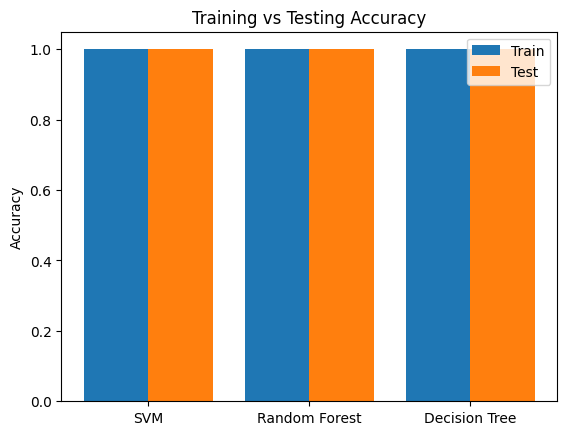

In [16]:
models = ["SVM", "Random Forest", "Decision Tree"]
train_acc = [svm_train_acc, rf_train_acc, dt_train_acc]
test_acc = [svm_test_acc, rf_test_acc, dt_test_acc]

x = np.arange(len(models))

plt.bar(x - 0.2, train_acc, 0.4, label="Train")
plt.bar(x + 0.2, test_acc, 0.4, label="Test")

plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.legend()
plt.show()


In [17]:
best_model = rf


In [18]:
y_pred = best_model.predict(X_test)

print("Final Test Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Final Test Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        31
         Yes       1.00      1.00      1.00        17

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48


Confusion Matrix:

[[31  0]
 [ 0 17]]


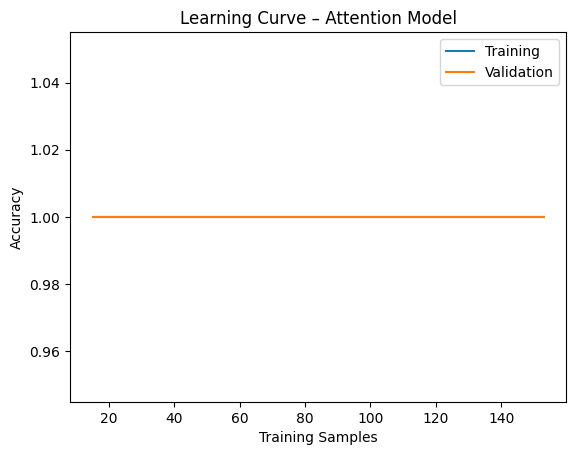

In [19]:
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train,
    cv=5, scoring="accuracy"
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Training")
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation")

plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curve – Attention Model")
plt.legend()
plt.show()


In [21]:
def predict_attention(
    a10_score, a10_time,
    a11_score, a11_time,
    accuracy_rate, skip_rate
):
    input_df = pd.DataFrame([{
        "activity10_score": a10_score,
        "activity10_time_sec": a10_time,
        "activity11_score": a11_score,
        "activity11_time_sec": a11_time,
        "accuracy_rate": accuracy_rate,
        "skip_rate": skip_rate
    }])

    pred = best_model.predict(input_df)[0]
    return "YES - Attention Impairment" if pred == 1 else "NO - Normal Attention"


In [22]:
predict_attention(
    a10_score=0,
    a10_time=91,
    a11_score=-1,
    a11_time=10,
    accuracy_rate=0.4,
    skip_rate=0.5
)


'NO - Normal Attention'